In [0]:
import numpy as np
import pandas as pd
import keras  
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten,Reshape
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator



## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [20]:
print("no. of samples in train : ",x_train.shape[0])

no. of samples in train :  60000


In [21]:
print("no. of samples in test : ",x_test.shape[0])

no. of samples in test :  10000


### Find dimensions of an image in the dataset

In [22]:
print("the dimensions of an image in the dataset ",x_train[0].shape)

the dimensions of an image in the dataset  (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [26]:
print(x_train[0])
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [28]:
print("already imported at the beginning...")

already imported at the beginning...


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [30]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

# Define model
model_1 = Sequential()

# 1st Conv Layer
model_1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model_1.add(Activation('relu'))

# 2nd Conv Layer
model_1.add(Convolution2D(32, 3, 3))
model_1.add(Activation('relu'))

# Fully Connected Layer
model_1.add(Flatten())
model_1.add(Dense(128))
model_1.add(Activation('relu'))

# Prediction Layer
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

# Loss and Optimizer
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model_1
model_1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
        validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.3631 - acc: 0.8685 - val_loss: 0.2915 - val_acc: 0.8908
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.2247 - acc: 0.9165 - val_loss: 0.2569 - val_acc: 0.9085
Epoch 3/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1641 - acc: 0.9388 - val_loss: 0.2341 - val_acc: 0.9179
Epoch 4/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.1129 - acc: 0.9580 - val_loss: 0.2670 - val_acc: 0.9133
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0744 - acc: 0.9735 - val_loss: 0.2970 - val_acc: 0.9132
Epoch 6/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0498 - acc: 0.9820 - val_loss: 0.3735 - val_acc: 0.9168
Epoch 7/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0338 - acc: 0.9879 - val_loss: 0.

In [31]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_15 (Activation)   (None, 128)              

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [32]:
# Define Model
model_2 = Sequential()

# 1st Conv Layer
model_2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model_2.add(Activation('relu'))

# 2nd Conv Layer
model_2.add(Convolution2D(32, 3, 3))
model_2.add(Activation('relu'))

# Max Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model_2.add(Dropout(0.25))

# Fully Connected Layer
model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(Activation('relu'))

# More Dropout
model_2.add(Dropout(0.5))

# Prediction Layer
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

# Loss and Optimizer
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model_2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
        validation_data=(x_test, y_test), callbacks=callback_list)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.5147 - acc: 0.8171 - val_loss: 0.3473 - val_acc: 0.8691
Epoch 2/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.3540 - acc: 0.8732 - val_loss: 0.2882 - val_acc: 0.8947
Epoch 3/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.3064 - acc: 0.8888 - val_loss: 0.2616 - val_acc: 0.9043
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.2754 - acc: 0.9002 - val_loss: 0.2472 - val_acc: 0.9070
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.2519 - acc: 0.9066 - val_loss: 0.2382 - val_acc: 0.9117
Epoch 6/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2338 - acc: 0.9140 - val_loss: 0.2446 - val_acc: 0.9108
Epoch 7/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.2195 - acc: 0.9189 - val_loss: 0.

In [33]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)             

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=False,  
    vertical_flip=False)  

datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

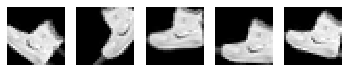

In [37]:
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
  
plt.show()

### Run the above model using fit_generator()

In [38]:
model_2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  12/1875 [..............................] - ETA: 20s - loss: 3.3028 - acc: 0.2708

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 22s 12ms/step - loss: 1.1671 - acc: 0.5722 - val_loss: 0.5057 - val_acc: 0.7999
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8904 - acc: 0.6695 - val_loss: 0.5057 - val_acc: 0.8050
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8174 - acc: 0.6958 - val_loss: 0.4812 - val_acc: 0.8243
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7755 - acc: 0.7121 - val_loss: 0.4962 - val_acc: 0.8155
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7448 - acc: 0.7231 - val_loss: 0.4865 - val_acc: 0.8306
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7161 - acc: 0.7329 - val_loss: 0.4913 - val_acc: 0.8213
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6957 - acc: 0.7389 - val_loss: 0.5023 - val_acc: 0.8204
Epoch 8/10
1875/1875 [==============================] - 21s

###  Report the final train and validation accuracy

In [40]:
batch_size=32
epochs = 10
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True )
loss,accuracy  = model_2.evaluate(x_test, y_test, verbose=True)
print("The accuracy of the model is :" , accuracy)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 190us/step - loss: 0.1485 - acc: 0.9435 - val_loss: 0.1933 - val_acc: 0.9333
Epoch 2/10
54000/54000 [==============================] - 10s 187us/step - loss: 0.1424 - acc: 0.9474 - val_loss: 0.1839 - val_acc: 0.9372
Epoch 3/10
54000/54000 [==============================] - 9s 168us/step - loss: 0.1388 - acc: 0.9489 - val_loss: 0.1781 - val_acc: 0.9362
Epoch 4/10
54000/54000 [==============================] - 10s 177us/step - loss: 0.1297 - acc: 0.9508 - val_loss: 0.1739 - val_acc: 0.9383
Epoch 5/10
54000/54000 [==============================] - 9s 171us/step - loss: 0.1290 - acc: 0.9512 - val_loss: 0.1857 - val_acc: 0.9372
Epoch 6/10
54000/54000 [==============================] - 10s 178us/step - loss: 0.1236 - acc: 0.9532 - val_loss: 0.1862 - val_acc: 0.9377
Epoch 7/10
54000/54000 [==============================] - 10s 177us/step - loss: 0.1219 - acc: 0.9537 - val_loss: 0.210

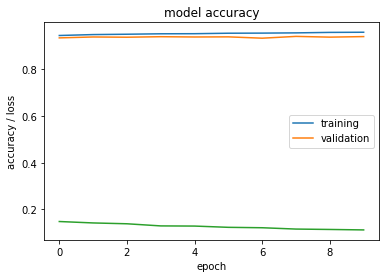

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [43]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [44]:
print("no. of samples in train : ",x_train.shape[0])

no. of samples in train :  50000


In [45]:
print("no. of samples in test : ",x_test.shape[0])

no. of samples in test :  10000


In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True,  
    vertical_flip=False)

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

[]

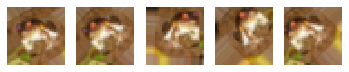

In [50]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')

plt.plot()